## Slow example

This is an example of my code that runs slow.  I am going to calculate the (Mie) X-ray scattering cross-section for a power-law distribution of dust grain sizes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import dust
import sigma_scat as ss

Set up the grain size distribution.  Let's assume all the dust grains are silicate.

In [4]:
AMIN, AMAX = 0.005, 0.25 # microns
NA  = 50  # number of points to use to sample distribution
RHO = 3.8 # grain density (g cm^-3)
P   = 3.5 # power law slope

mrn = dust.Dustdist( rad=np.linspace(AMIN,AMAX,NA), rho=RHO, p=P )

Calculate the scattering and extinction opacity

In [5]:
ENERGY = np.logspace(-1,1,50)
MDUST  = 1.e22 * dust.c.mp() * 0.009  # magic numbers (dust mass per 10^22 H)

In [6]:
kappascat = ss.Kappascat( E=ENERGY, dist=dust.Dustspectrum(rad=mrn), scatm=ss.makeScatmodel('Mie','Silicate'))

In [7]:
kappascat(with_mp=False)

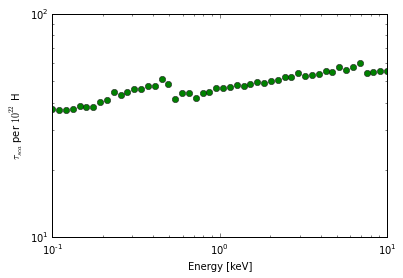

In [8]:
plt.plot( ENERGY, kappascat.kappa*MDUST, 'go' )
plt.loglog()
plt.xlabel('Energy [keV]')
plt.ylabel(r'$\tau_{sca}$ per $10^{22}$ H')

How about the extinction cross-section for a single grain size?

In [ ]:
RGRAIN = 0.25 # micron
kext = ss.Kappaext( E=ENERGY, dist=dust.Dustspectrum(rad=dust.Grain(RGRAIN, rho=RHO)), 
                    scatm=ss.makeScatmodel('Mie','Silicate') )

In [ ]:
plt.plot(ENERGY, kext.kappa*MDUST, 'go')
plt.loglog()

plt.xlabel('Energy [keV]')
plt.ylabel(r'$\tau_{ext}$ per $10^{22}$ H')

## Finding out what is slow

The Python Profiler helps you identify the bottlenecks in your code. In general, you want to use the C version of it: cProfile. The simplest way to run it is to execute it via: `cProfile.run(command,filename)`, where command is a string containing the command you wish to profile, and filename is the file you want to write the results to.

In [8]:
import cProfile
import pstats

In [9]:
profile_name = 'Kappascat.prof'

In [10]:
cProfile.run("kappascat(with_mp=False)",filename=profile_name)

In [11]:
stats = pstats.Stats(profile_name)
stats.strip_dirs()

<pstats.Stats instance at 0x10e11f128>

In [12]:
stats.sort_stats('cumtime').print_stats(20)

Tue Sep 29 07:38:20 2015    Kappascat.prof

         3272507 function calls in 44.518 seconds

   Ordered by: cumulative time
   List reduced from 70 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   44.518   44.518 <string>:1(<module>)
        1    0.001    0.001   44.518   44.518 sigma_scat.py:189(__init__)
       50    0.037    0.001   44.515    0.890 scatmodels.py:398(Qsca)
       50   25.640    0.513   44.478    0.890 scatmodels.py:126(getQs)
       50    5.763    0.115    5.767    0.115 scatmodels.py:373(create_d)
   326635    3.255    0.000    3.255    0.000 scatmodels.py:393(update_gsca)
   326685    3.063    0.000    3.063    0.000 {dust.scattering_utils.an_bn}
   326685    2.822    0.000    2.822    0.000 scatmodels.py:388(compute_qsca)
   326685    2.132    0.000    2.132    0.000 scatmodels.py:390(compute_gsca)
  1306793    1.570    0.000    1.570    0.000 {numpy.core.multiarray.zeros}
   653

<pstats.Stats instance at 0x10e11f128>

### Results of a previous run

```
Mon Sep 28 19:00:17 2015    Kappascat.prof

         2292502 function calls in 60.064 seconds

   Ordered by: cumulative time
   List reduced from 66 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   60.064   60.064 <string>:1(<module>)
        1    0.001    0.001   60.063   60.063 sigma_scat.py:189(__init__)
       50    0.054    0.001   60.061    1.201 scatmodels.py:382(Qsca)
       50   57.759    1.155   60.007    1.200 scatmodels.py:123(getQs)
  1306843    1.649    0.000    1.649    0.000 {numpy.core.multiarray.zeros}
   326685    0.303    0.000    0.303    0.000 {numpy.core.multiarray.where}
   653480    0.283    0.000    0.283    0.000 fromnumeric.py:2514(size)
```